In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
v1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
v2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])


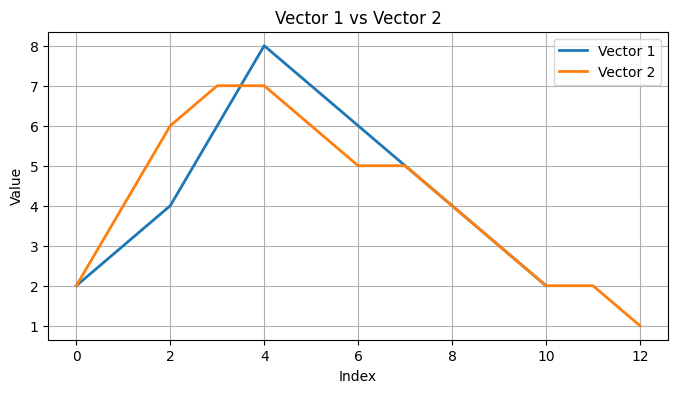

In [3]:
plt.figure(figsize=(8, 4))
plt.plot(v1, label="Vector 1", linewidth=2)
plt.plot(v2, label="Vector 2", linewidth=2)
plt.title("Vector 1 vs Vector 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



In [4]:
def dtw(seq1, seq2):
    n, m = len(seq1), len(seq2)
    cost = np.zeros((n, m))

    # Initialize first cell
    cost[0, 0] = abs(seq1[0] - seq2[0])

    # First row
    for j in range(1, m):
        cost[0, j] = cost[0, j-1] + abs(seq1[0] - seq2[j])

    # First column
    for i in range(1, n):
        cost[i, 0] = cost[i-1, 0] + abs(seq1[i] - seq2[0])

    # Fill rest of cost matrix
    for i in range(1, n):
        for j in range(1, m):
            min_cost = min(cost[i-1, j],    # insertion
                           cost[i, j-1],    # deletion
                           cost[i-1, j-1])  # match
            cost[i, j] = abs(seq1[i] - seq2[j]) + min_cost

    # Backtracking optimal path
    i, j = n - 1, m - 1
    path = [(i, j)]

    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            step = np.argmin([cost[i-1, j], cost[i, j-1], cost[i-1, j-1]])

            if step == 0:
                i -= 1
            elif step == 1:
                j -= 1
            else:
                i -= 1
                j -= 1

        path.append((i, j))

    path.reverse()
    return cost, path


In [5]:
cost_matrix, warping_path = dtw(v1, v2)

print("Accumulated Cost Matrix:\n")
print(cost_matrix)


Accumulated Cost Matrix:

[[ 0.  2.  6. 11. 16. 20. 23. 26. 28. 29. 29. 29. 30.]
 [ 1.  1.  4.  8. 12. 15. 17. 19. 20. 20. 21. 22. 24.]
 [ 3.  1.  3.  6.  9. 11. 12. 13. 13. 14. 16. 18. 21.]
 [ 7.  3.  1.  2.  3.  3.  4.  5.  7. 10. 14. 18. 23.]
 [13.  7.  3.  2.  3.  5.  6.  7.  9. 12. 16. 20. 25.]
 [18. 10.  4.  2.  2.  3.  5.  7. 10. 13. 17. 21. 26.]
 [22. 12.  4.  3.  3.  2.  3.  4.  6.  9. 13. 17. 22.]
 [25. 13.  5.  5.  5.  3.  2.  2.  3.  5.  8. 11. 15.]
 [27. 13.  7.  8.  8.  5.  3.  3.  2.  3.  5.  7. 10.]
 [28. 14. 10. 11. 12.  8.  5.  5.  3.  2.  3.  4.  6.]
 [28. 16. 14. 15. 16. 12.  8.  8.  5.  3.  2.  2.  3.]]


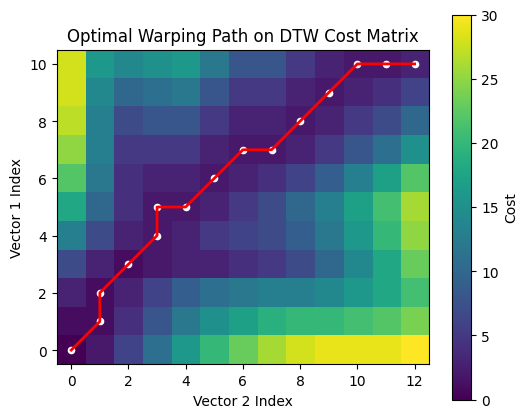

In [6]:
plt.figure(figsize=(6, 5))
plt.imshow(cost_matrix, cmap='viridis', origin='lower')
plt.colorbar(label="Cost")

# Extract path coordinates
px, py = zip(*warping_path)

plt.plot(py, px, color='red', linewidth=2)
plt.scatter(py, px, color='white', s=20)

plt.title("Optimal Warping Path on DTW Cost Matrix")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
plt.show()


In [7]:
dtw_distance = cost_matrix[-1, -1]
print("\nDTW Distance =", dtw_distance)



DTW Distance = 3.0


In [8]:
print("\nInference:")
print("DTW aligns the sequences even though Vector 2 is longer and slightly stretched.")
print("The warping path shows how values from both vectors match through non-linear time alignment.")
print("The DTW distance (", dtw_distance, ") indicates a high degree of similarity between the sequences.")


Inference:
DTW aligns the sequences even though Vector 2 is longer and slightly stretched.
The warping path shows how values from both vectors match through non-linear time alignment.
The DTW distance ( 3.0 ) indicates a high degree of similarity between the sequences.
